# <center><strong> Bike rental analysis</strong></center>

#### **By Mohamed Jamyl**

http://linkedin.com/in/mohamed-jamyl

https://www.kaggle.com/mohamedjamyl

https://github.com/Mohamed-Jamyl

---------------------------

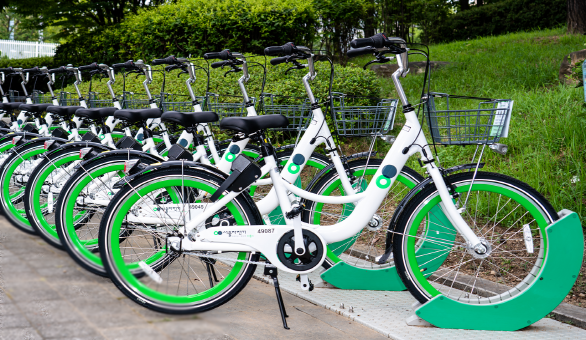

In [2]:
from IPython.display import Image
Image(filename='bi.png')

------------------------------

## <center><strong> Project Overview </strong></center>

#### **Bike share systems are a way to rent bikes where the process of obtaining membership, renting and returning bikes is automated through a network of kiosks located throughout the city. Through these systems, people can rent a bike from one location and return it to another location based on their needs. Currently, there are more than 500 bike share programs around the world.**

---------------------------------
---------------------------------
---------------------------------

## **Import Libraries** 

In [1]:
from pandas import read_csv, DataFrame, melt 
from matplotlib.pyplot import show, suptitle, subplots_adjust, tight_layout, subplots, scatter
from matplotlib.pyplot import figure, title, xlabel, ylabel, grid, tight_layout
from numpy import log, inf
from seaborn import kdeplot, heatmap, boxplot, regplot, countplot ,barplot, pointplot
from datetime import datetime
import calendar 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

----------------------------------
----------------------------------

## **Exploratory Data Analysis (EDA)**

### **Initial Data Understanding**

 - **Data loading and Inspection**
 - **Data Types**
 - **Missing Values**
 - **Duplicates**

----------------------

In [4]:
df = read_csv("vlib.csv")
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.shape

(10886, 12)

In [6]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
df.rename(columns={'casual': 'non-subscribed_users', 
                   'registered':'subscribed_users', 
                   'count': 'count_of_users', 
                   'temp':'Actual_Temperature', 
                   'atemp':'Feels_Like_Temperature'} ,inplace=True)

In [8]:
df

,datetime,season,holiday,workingday,weather,Actual_Temperature,Feels_Like_Temperature,humidity,windspeed,non-subscribed_users,subscribed_users,count_of_users
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   datetime                10886 non-null  object 
 1   season                  10886 non-null  int64  
 2   holiday                 10886 non-null  int64  
 3   workingday              10886 non-null  int64  
 4   weather                 10886 non-null  int64  
 5   Actual_Temperature      10886 non-null  float64
 6   Feels_Like_Temperature  10886 non-null  float64
 7   humidity                10886 non-null  int64  
 8   windspeed               10886 non-null  float64
 9   non-subscribed_users    10886 non-null  int64  
 10  subscribed_users        10886 non-null  int64  
 11  count_of_users          10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [10]:
df.isnull().sum()

datetime                  0
season                    0
holiday                   0
workingday                0
weather                   0
Actual_Temperature        0
Feels_Like_Temperature    0
humidity                  0
windspeed                 0
non-subscribed_users      0
subscribed_users          0
count_of_users            0
dtype: int64

In [11]:
df.duplicated().sum()

0

-----------------------
-----------------------

### **Basic Statistical Overview**

---------------------------------

- #### Summary Statistical : **describe()**

In [12]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
Actual_Temperature,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
Feels_Like_Temperature,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
non-subscribed_users,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
subscribed_users,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [13]:
df.select_dtypes(include='object').describe()

,datetime
count,10886
unique,10886
top,2011-01-01 00:00:00
freq,1


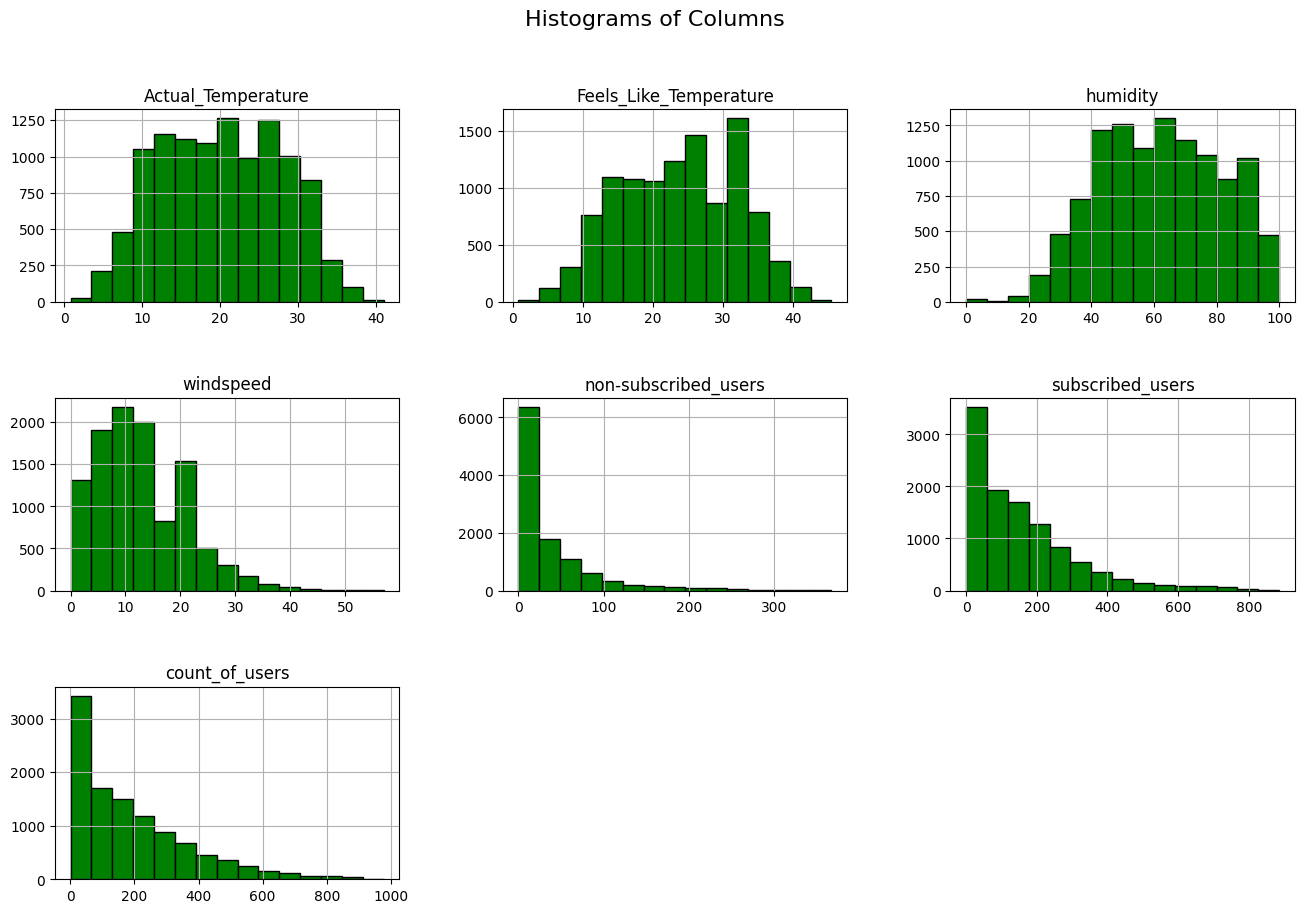

In [14]:
df.drop(['datetime','season','holiday','workingday','weather'],axis=1).hist(bins=15, figsize=(16, 10), color='green', edgecolor='black')

# Set titles and labels for each subplot
suptitle('Histograms of Columns', fontsize=16)
subplots_adjust(hspace=0.5)  # Add space between plots
show()

-----------------------

- Summary Statistical : **value_counts()**

In [15]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

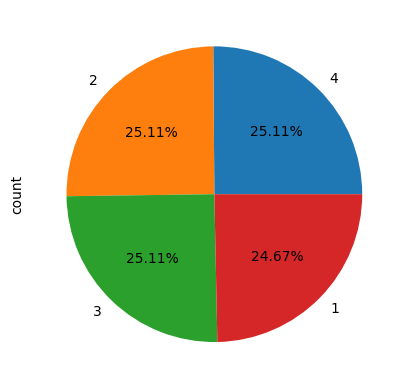

In [16]:
df['season'].value_counts().plot.pie(autopct='%0.2f%%')
show()

--------------------------

In [17]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

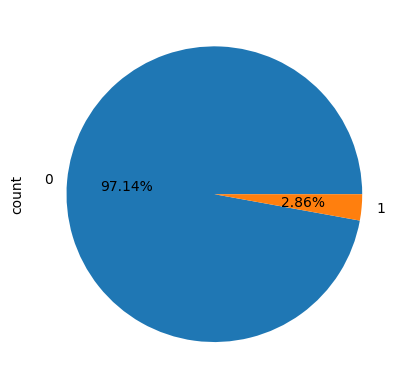

In [18]:
df['holiday'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-------------------


In [19]:
df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

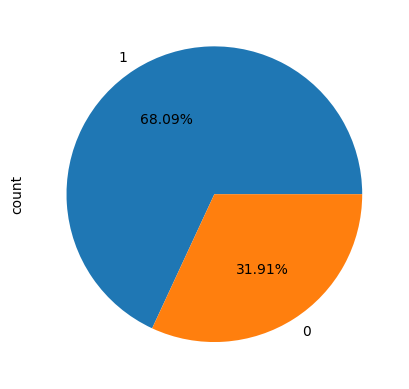

In [20]:
df['workingday'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-----------------------

In [21]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

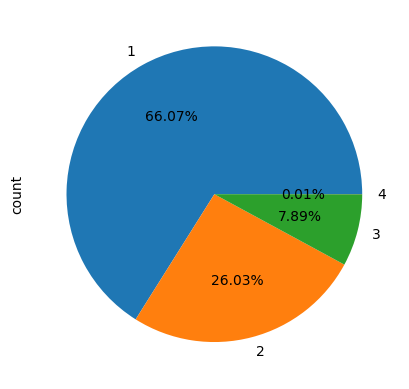

In [22]:
df['weather'].value_counts().plot.pie(autopct='%0.2f%%')
show()

----------------------
----------------------

## **Distribution of Variables**

- **Numerical Features (KDE)**

-------------------------------

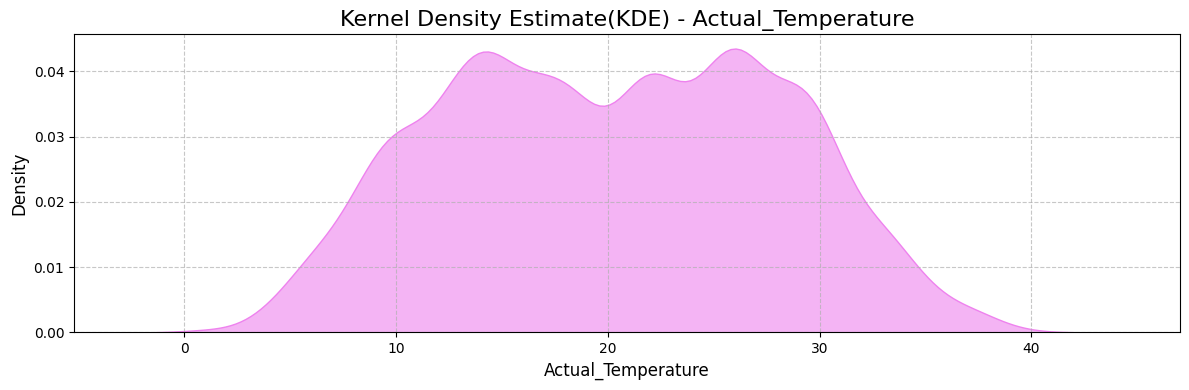

In [23]:
figure(figsize=(12,	4))
kdeplot(df['Actual_Temperature'], fill=True,	color='violet', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Actual_Temperature',	fontsize=16)
xlabel('Actual_Temperature', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Shape of the Distribution**: The distribution of 'Actual Temperature' appears to be bimodal, meaning it has two distinct peaks.

- ##### The first peak is roughly around 14-15 degrees.
- ##### The second, slightly higher peak, is around 25-26 degrees.
- ##### The distribution is somewhat symmetrical around these two peaks, but with a slight tendency to extend further on the right side.

#### **Concentration of Data**:

- ##### There are two main clusters of actual temperatures, corresponding to the two peaks. This suggests that the temperatures frequently fall into these two distinct ranges.
- ##### The density is lower at the very low (near 0 degrees) and very high (above 40 degrees) ends of the temperature scale, indicating that these extreme temperatures are less common.

#### **Range of Temperatures**: The temperatures range approximately from just below 0 degrees to slightly over 40 degrees.

#### **The KDE plot for 'Actual Temperature' reveals a bimodal distribution, suggesting two common temperature ranges. This could potentially indicate a dataset that combines temperatures from different seasons (e.g., cooler and warmer periods) or different geographical locations with distinct temperature profiles.**

----------------------------------------------

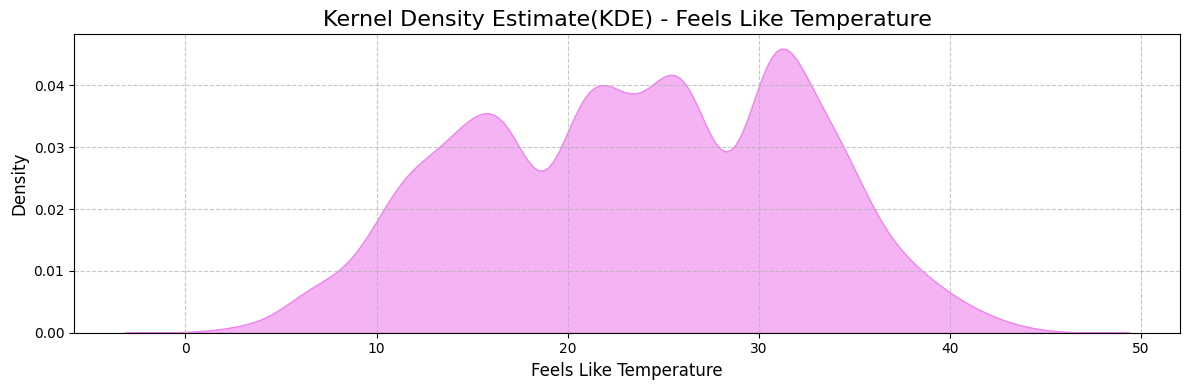

In [24]:
figure(figsize=(12,	4))
kdeplot(df['Feels_Like_Temperature'], fill=True,	color='violet', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - Feels Like Temperature',	fontsize=16)
xlabel('Feels Like Temperature', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Shape of the Distribution**: The distribution of 'Feels Like Temperature' appears to be multi-modal, specifically with three discernible peaks.

- ##### The first peak is roughly around 14-15 degrees.

- ##### The second peak is around 25 degrees.

- ##### The third, and highest, peak is around 32 degrees.

- ##### The distribution is generally spread across the range, with a slight tendency to extend further on the right side.

#### **Concentration of Data**:

- ##### There are three main clusters of 'Feels Like Temperature' values, corresponding to the three peaks. This suggests that the "feels like" temperatures frequently fall into these three distinct ranges.

- ##### The density is lower at the very low (near 0 degrees) and very high (above 40 degrees) ends of the temperature scale, indicating that these extreme "feels like" temperatures are less common.

#### **Range of Temperatures**: The 'Feels Like Temperature' values range approximately from just below 0 degrees to slightly over 40 degrees.

#### **The KDE plot for 'Feels Like Temperature' reveals a multi-modal distribution (three peaks), suggesting multiple common "feels like" temperature ranges. This could potentially indicate a dataset that combines temperatures from different seasons (e.g., cooler, mild, and warmer periods) or different geographical locations with distinct perceived temperature profiles.**

-----------------------------------

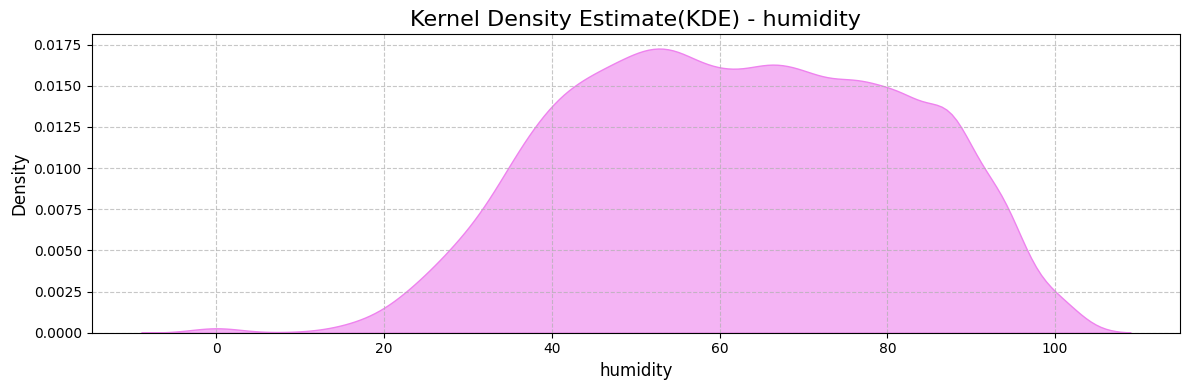

In [25]:
figure(figsize=(12,	4))
kdeplot(df['humidity'], fill=True,	color='violet', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - humidity',	fontsize=16)
xlabel('humidity', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Shape of the Distribution**: The distribution of 'humidity' appears to be bimodal, meaning it has two distinct peaks.

- ##### The first, smaller peak, is roughly around 55% humidity.

- ##### The second, slightly higher peak, is around 80% humidity.

- ##### The distribution is generally symmetrical around these two peaks, but with a slight tendency to extend further on the right side.

#### **Concentration of Data**:

- ##### There are two main clusters of humidity values, corresponding to the two peaks. This suggests that humidity frequently falls into these two distinct ranges.

- ##### The density is very low at extremely low humidity levels (near 0-20%) and gradually tapers off at very high humidity levels (above 90%, reaching close to 100%).

#### **Range of Humidity**: The humidity values range approximately from just below 0% to slightly over 100%.

#### **The KDE plot for 'humidity' reveals a bimodal distribution, suggesting two common humidity ranges. This could potentially indicate a dataset that combines data from different environmental conditions (e.g., drier and more humid periods, or different locations with distinct humidity profiles).**

----------------------------

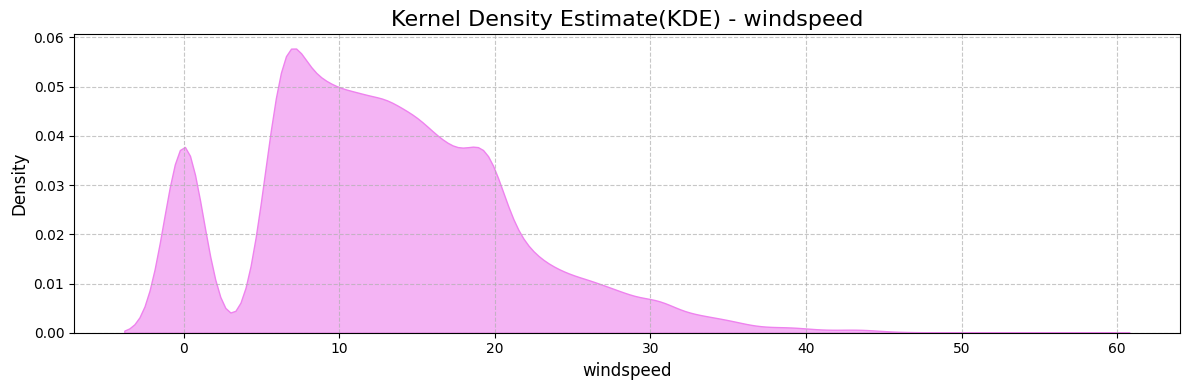

In [26]:
figure(figsize=(12,	4))
kdeplot(df['windspeed'], fill=True,	color='violet', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - windspeed',	fontsize=16)
xlabel('windspeed', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Shape of the Distribution**: The distribution of 'windspeed' appears to be multi-modal, with at least two distinct peaks.

- ##### The first, smaller peak, is very close to 0 (zero) windspeed.
- ##### The second, and highest, peak is around 7-8 windspeed units.
- ##### There's also a noticeable bump or third peak around 18-20 windspeed units.
- ##### The distribution is right-skewed, with a long tail extending towards higher windspeeds (up to around 60 units).

#### **Concentration of Data:**

- ##### A significant portion of the data is concentrated at very low windspeeds (near zero), suggesting periods of calm or very light winds.
- ##### The most frequent windspeeds are in the 7-8 unit range.
- ##### Another common range for windspeed is around 18-20 units.
- ##### Higher windspeeds (above 20 units) become progressively less common, as indicated by the tapering tail of the distribution.

#### **Range of Windspeeds**: The windspeed values range approximately from 0 to just over 60 units.

#### **The KDE plot for 'windspeed' reveals a complex distribution with multiple common windspeed ranges. The most frequent windspeeds are moderate (around 7-8 units), but there are also many instances of very low windspeeds and a smaller, but still noticeable, cluster of higher windspeeds. The right-skewness indicates that extremely high windspeeds are rare.**

-------------------------

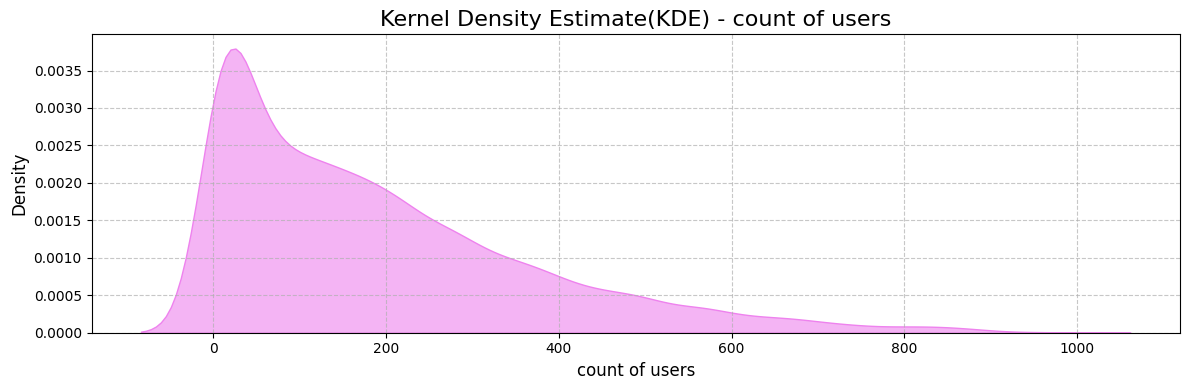

In [27]:
figure(figsize=(12,	4))
kdeplot(df['count_of_users'], fill=True,	color='violet', alpha=0.6)
title(f'Kernel Density Estimate(KDE) - count of users',	fontsize=16)
xlabel('count of users', fontsize=12)
ylabel('Density', fontsize=12)
grid(True, linestyle='--', alpha=0.7)
tight_layout()
show()

#### **Shape of the Distribution**: The distribution of 'count of users' is highly right-skewed (positively skewed). This means that the tail of the distribution extends much further to the right, indicating that there are many instances with a low count of users and fewer instances with a very high count of users.

- ##### **Peak Concentration**: The highest density (most frequent occurrence) of 'count of users' is very close to 0, specifically peaking just above 0. This suggests that the most common scenario is a very low number of users.

- ##### **Rapid Decline**: After the initial peak, the density drops off sharply and then gradually tapers as the 'count of users' increases. This illustrates that as the number of users grows, the frequency of observing that count decreases significantly.

- ##### **Range of Users**: The 'count of users' ranges approximately from 0 up to around 1000, with a very long, thin tail extending towards the higher values.

#### **The KDE plot for 'count of users' reveals a distribution where very low user counts are extremely common, and the frequency of observing higher user counts diminishes rapidly. This is typical for data where many entities have minimal engagement or presence, while only a few have a large following or high activity.**

----------------------------

### **Ckecking Correlation between the features**

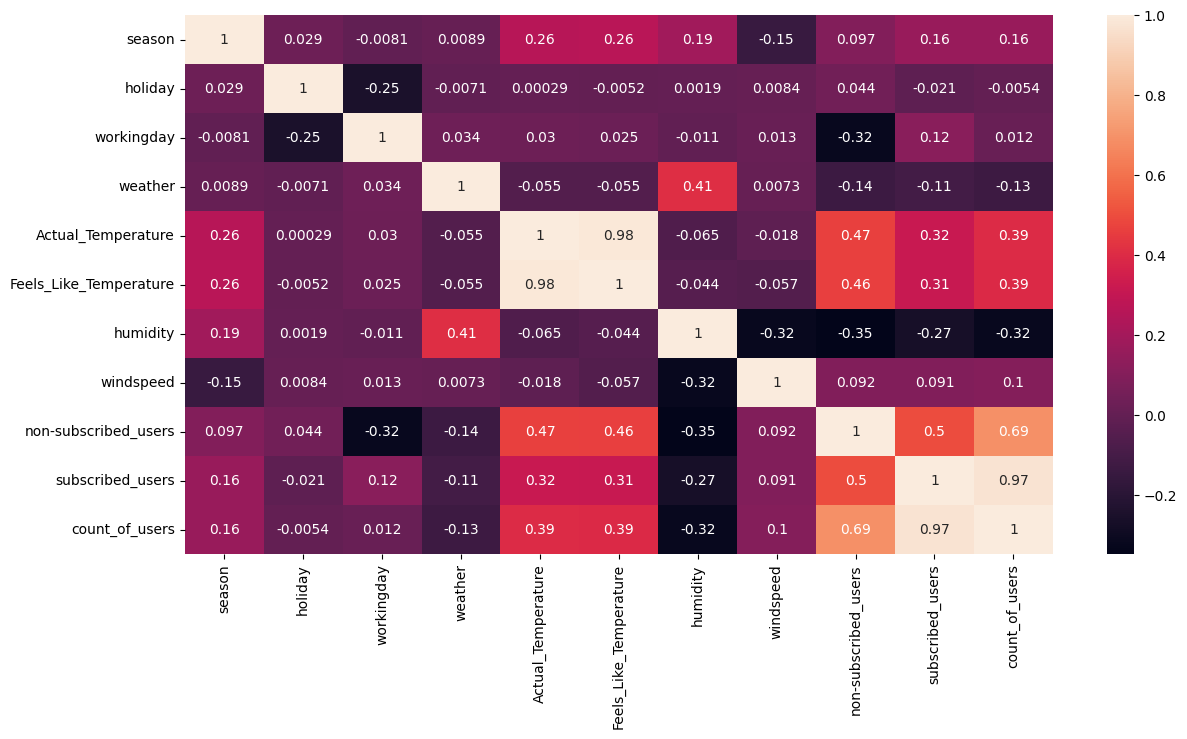

In [28]:
figure(figsize=(14,	7))
heatmap(df.select_dtypes(include='number').corr(), annot=True)
show()

#### **Temperature Variables are Highly Correlated:**

- ##### **Actual_Temperature** and **Feels_Like_Temperature** have an extremely strong positive correlation (0.98). This is expected, as "feels like" temperature is typically derived from actual temperature with adjustments for humidity and wind.

- ##### Both **Actual_Temperature** and **Feels_Like_Temperature** show moderate positive correlations with season (0.26 for both). This makes sense as temperature varies with the season.

#### **User Counts and Their Components:**

- ##### **count_of_users** is very strongly positively correlated with **subscribed_users** (0.97) and **non-subscribed_users** (0.69). This is also expected, as **count_of_users** is likely the sum or a combination of these two categories.

- ##### **subscribed_users** and **non-subscribed_users** have a moderate positive correlation (0.50), suggesting that periods with more non-subscribed users also tend to have more subscribed users, or vice-versa.

#### **Environmental Factors and User Counts:**

- ##### **Actual_Temperature** and **Feels_Like_Temperature** show moderate positive correlations with **non-subscribed_users** (0.47 and 0.46 respectively) and **subscribed_users** (0.32 and 0.31). This suggests that warmer temperatures might be associated with a higher count of both types of users.

- ##### **humidity** has a moderate negative correlation with **non-subscribed_users** (-0.35) **and subscribed_users** (-0.27), and consequently with **count_of_users** (-0.32). This implies that higher humidity might be associated with fewer users.

- ##### **windspeed** shows very weak correlations with all user count variables (around 0.1 or less), suggesting it's not a strong predictor of user numbers.

#### **Other Notable Correlations**:

- ##### weather has a moderate positive correlation with **humidity** (0.41) and a weak negative correlation with **Actual_Temperature** and **Feels_Like_Temperature** (-0.055 for both). This indicates that certain weather conditions are associated with higher **humidity** and slightly lower temperatures.

- ##### **workingday** has a weak negative correlation with **holiday** (-0.25), which is logical as a working day is typically not a holiday.

- ##### **workingday** also has a weak negative correlation with **non-subscribed_users** (-0.32), suggesting fewer non-subscribed users on working days.

---------------------------

##### There is a high positive correlation (0.97) between **subscribed_users** and **count_of_users**

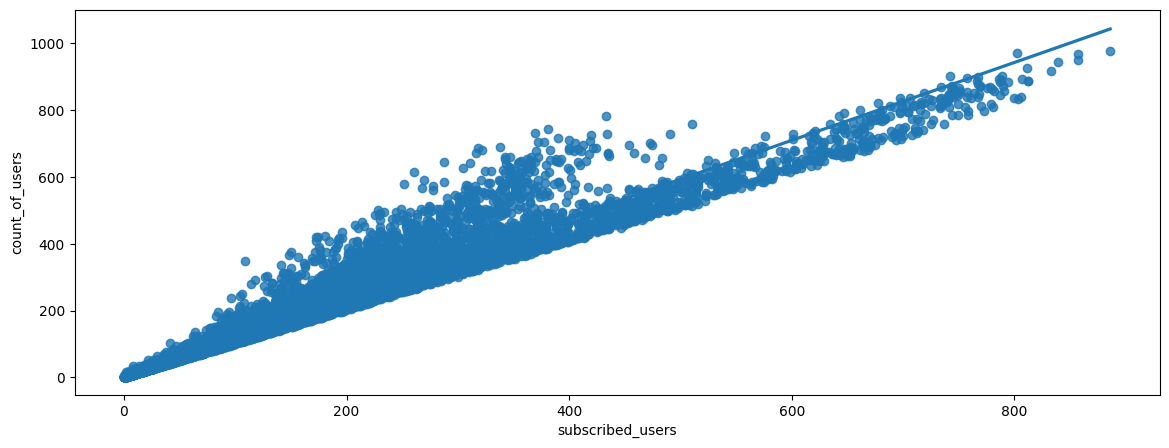

In [29]:
fig,ax = subplots()
fig.set_size_inches(14, 5)
regplot(x="subscribed_users", y="count_of_users", data=df,ax=ax)
show()

-------------------------
-------------------------

## **Feature Extraction**

----------------------------

#### Extracting new column **[date]** from **[datetime]**

In [30]:
"2011-01-01 00:00:00".split()

['2011-01-01', '00:00:00']

In [31]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [32]:
df['datetime'][0].split()[0]

'2011-01-01'

In [33]:
df["date"] = df['datetime'].apply(lambda x : x.split()[0])

In [34]:
df['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

--------------------

#### Extracting new column **[time]** from **[dateime]**

In [35]:
df['datetime'][0].split()

['2011-01-01', '00:00:00']

In [36]:
df['datetime'][0].split()[1]

'00:00:00'

In [37]:
df['time'] = df['datetime'].apply(lambda x : x.split()[1])

In [38]:
df['time'].head()

0    00:00:00
1    01:00:00
2    02:00:00
3    03:00:00
4    04:00:00
Name: time, dtype: object

-------------------------------------

#### Extracting new column **[year]** from **[date]**

In [39]:
df['date'][0].split()[0]

'2011-01-01'

In [40]:
df['date'][0].split()[0].split('-')[0]

'2011'

In [41]:
df['year'] =df['date'].apply(lambda x : x.split()[0].split('-')[0])

In [42]:
df['year'].value_counts()

year
2012    5464
2011    5422
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_6288\3002803647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='year', data=df, palette=['green','red'])


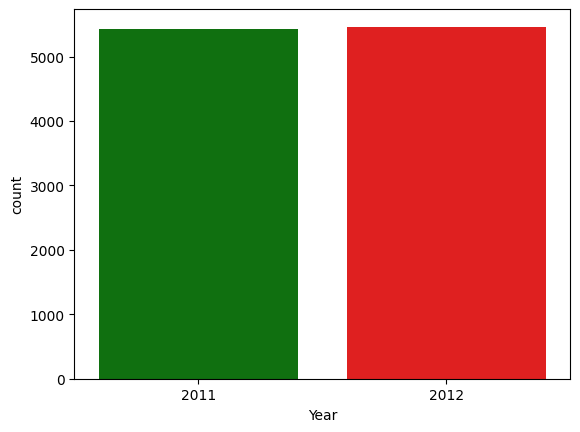

In [43]:
countplot(x='year', data=df, palette=['green','red'])
xlabel('Year')
show()

-------------------------------

#### Extracting new column **[month]** from **[date]**

In [44]:
df['date'][0].split()[0]

'2011-01-01'

In [45]:
df['date'][0].split()[0].split('-')[1]

'01'

In [46]:
df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

0         January
1         January
2         January
3         January
4         January
           ...   
10881    December
10882    December
10883    December
10884    December
10885    December
Name: date, Length: 10886, dtype: object

In [47]:
df["month"] = df['date'].apply(lambda x : calendar.month_name[datetime.strptime(x,"%Y-%m-%d").month])

In [48]:
df['month'].head()

0    January
1    January
2    January
3    January
4    January
Name: month, dtype: object

In [49]:
df['month'].value_counts()

month
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: count, dtype: int64

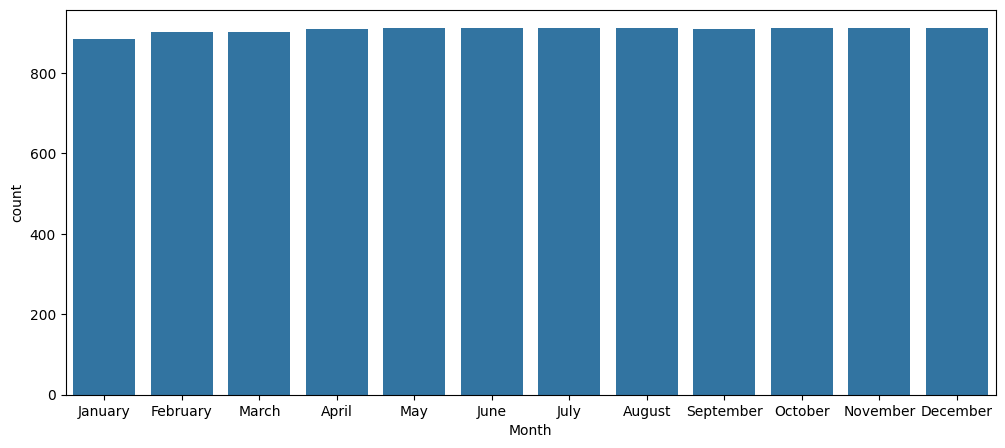

In [50]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='month', data=df)
xlabel('Month')
show()

------------------------

#### Extracting new column **[day]** from **[date]**

In [51]:
df['date'][0].split()[0]

'2011-01-01'

In [52]:
df['date'][0].split()[0].split('-')[2]

'01'

In [53]:
df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
10881    Wednesday
10882    Wednesday
10883    Wednesday
10884    Wednesday
10885    Wednesday
Name: date, Length: 10886, dtype: object

In [54]:
df["day"] = df['date'].apply(lambda x : calendar.day_name[datetime.strptime(x,"%Y-%m-%d").weekday()])

In [55]:
df["day"].head()

0    Saturday
1    Saturday
2    Saturday
3    Saturday
4    Saturday
Name: day, dtype: object

In [56]:
df["day"].value_counts()

day
Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: count, dtype: int64

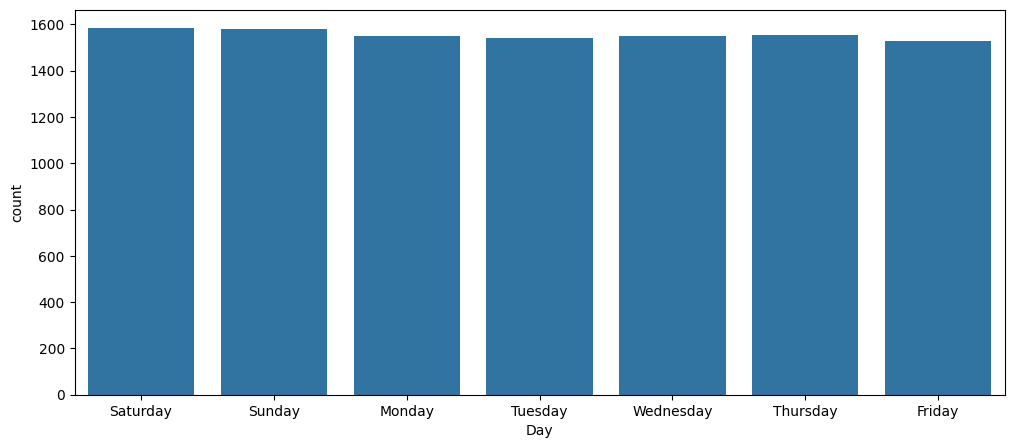

In [57]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='day', data=df)
xlabel('Day')
show()

------------------------

#### Extracting new column **[weekend]** from **[day]**

In [58]:
def WeekEnd(day):
    day = str(day)
    if day == 'Saturday' or day == 'Sunday':
        return 'Weekend'
    else:
        return 'No'

df['weekend'] = df['day'].apply(lambda x : WeekEnd(x))

In [59]:
df['weekend'].value_counts()

weekend
No         7723
Weekend    3163
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_6288\565876869.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='weekend', data=df, palette=['green','red'])


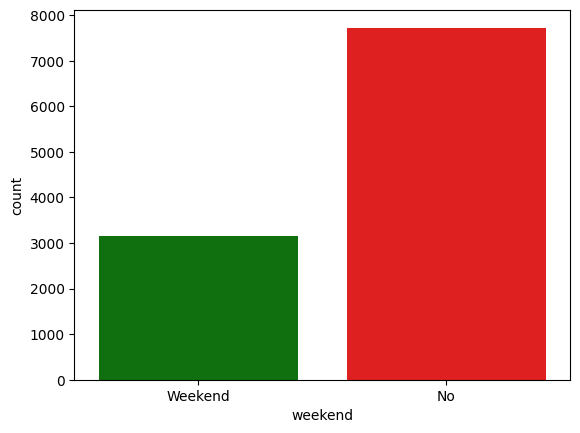

In [60]:
countplot(x='weekend', data=df, palette=['green','red'])
show()

------------------------

#### Extracting new column **[hour]** from **[time]**

In [61]:
df['time'][0]

'00:00:00'

In [62]:
df['time'][0].split(':')[0]

'00'

In [63]:
df['time'].apply(lambda x : x.split(":")[0])

0        00
1        01
2        02
3        03
4        04
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: time, Length: 10886, dtype: object

In [64]:
df["hour"] = df['time'].apply(lambda x : x.split(":")[0])

In [65]:
df['hour'].value_counts()

hour
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
09    455
08    455
07    455
06    455
00    455
01    454
05    452
02    448
04    442
03    433
Name: count, dtype: int64

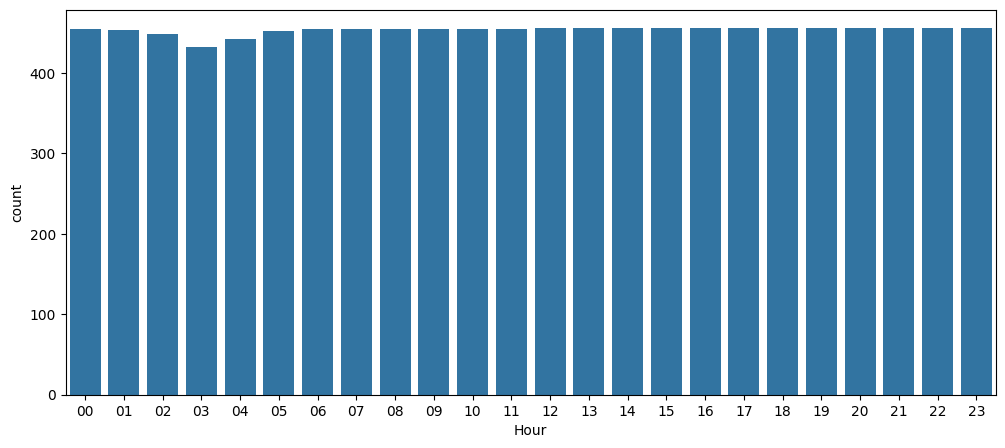

In [66]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='hour', data=df)
xlabel('Hour')
show()

------------------------

#### Extracting new column **[the_usual_time_periods_per_day]** from **[hour]**

In [67]:
df['hour'] = df['hour'].astype(int)

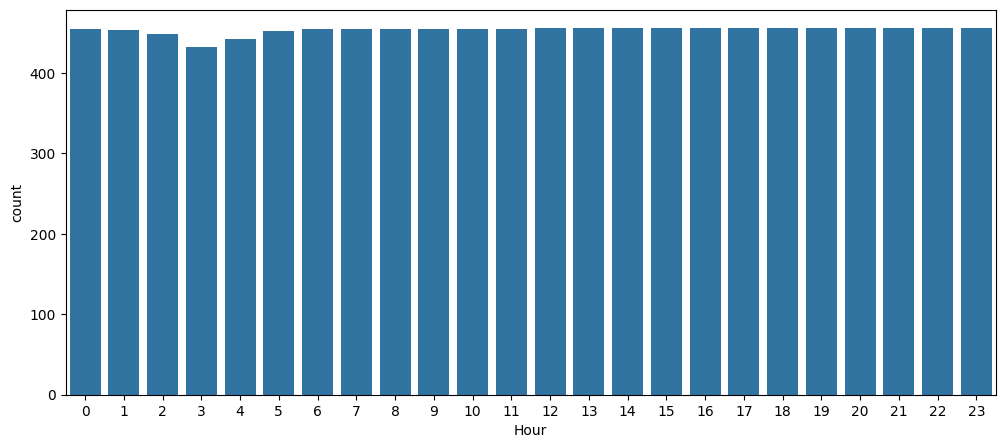

In [68]:
fig,ax= subplots()
fig.set_size_inches(12,5)
countplot(x='hour', data=df)
xlabel('Hour')
show()

In [69]:
def TheUsualTimePeriodsPerDay(hour):
    hour = int(hour)
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 13:
        return 'Midday/Noon'
    elif 14 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 20:
        return 'Evening'
    elif 21 <= hour <= 23:
        return 'Night'
    else: # 0 <= hour <= 5
        return 'Midnight and After'

df['the_usual_time_periods_per_day'] = df['hour'].apply(lambda x : TheUsualTimePeriodsPerDay(x))

In [70]:
df['the_usual_time_periods_per_day'].value_counts()

the_usual_time_periods_per_day
Morning               2730
Midnight and After    2684
Afternoon             1824
Evening               1368
Night                 1368
Midday/Noon            912
Name: count, dtype: int64

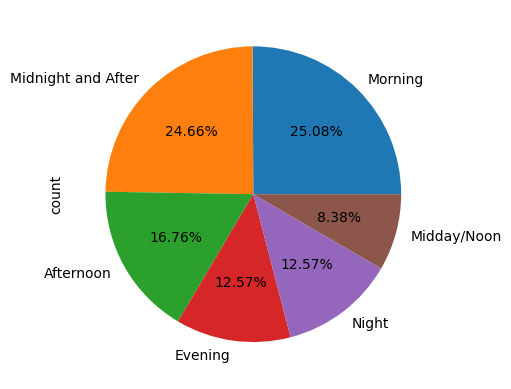

In [71]:
df['the_usual_time_periods_per_day'].value_counts().plot.pie(autopct='%0.2f%%')
show()

-----------------------

#### Extracting new column **[weather_feeling]** from **[Feels_Like_Temperature]**

In [72]:
df['Feels_Like_Temperature'].unique()

array([14.395, 13.635, 12.88 , 17.425, 19.695, 16.665, 21.21 , 22.725,
       21.97 , 20.455, 11.365, 10.605,  9.85 ,  8.335,  6.82 ,  5.305,
        6.06 ,  9.09 , 12.12 ,  7.575, 15.91 ,  3.03 ,  3.79 ,  4.545,
       15.15 , 18.18 , 25.   , 26.515, 27.275, 29.545, 23.485, 25.76 ,
       31.06 , 30.305, 24.24 , 18.94 , 31.82 , 32.575, 33.335, 28.79 ,
       34.85 , 35.605, 37.12 , 40.15 , 41.665, 40.91 , 39.395, 34.09 ,
       28.03 , 36.365, 37.88 , 42.425, 43.94 , 38.635,  1.515,  0.76 ,
        2.275, 43.18 , 44.695, 45.455])

In [73]:
def classify_temperature(FeelsLikeTemperature):
    
    if FeelsLikeTemperature < 0:
        return 'Freezing Cold'
    elif FeelsLikeTemperature < 11:
        return 'Cold'
    elif FeelsLikeTemperature < 21:
        return 'Cool'
    elif FeelsLikeTemperature < 26:
        return 'Mild'
    elif FeelsLikeTemperature < 31:
        return 'Warm'
    elif FeelsLikeTemperature < 36:
        return 'Hot'
    else:
        return 'Extremely Hot'

df['weather_feeling'] = df['Feels_Like_Temperature'].apply(lambda x : classify_temperature(x))

In [74]:
df['weather_feeling'].value_counts()

weather_feeling
Cool             3329
Mild             2375
Hot              2272
Warm             1539
Cold              743
Extremely Hot     628
Name: count, dtype: int64

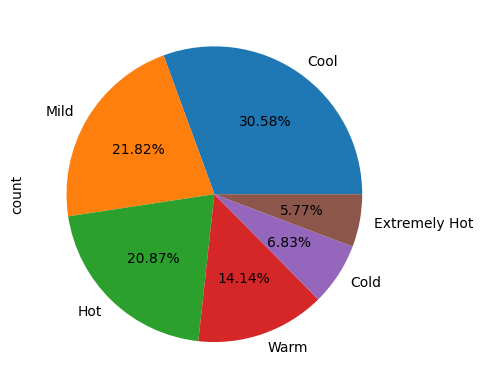

In [75]:
df['weather_feeling'].value_counts().plot.pie(autopct='%0.2f%%')
show()

------------------------

#### Mapping **season column**

In [76]:
df['season'].value_counts()

season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64

In [77]:
dictionnaire_saisons = {1 :"Winter" , 2: "Spring", 3 : "Summer", 4 : "Fall"}
df["season"] = df["season"].map(dictionnaire_saisons)


In [78]:
df['season'].value_counts()

season
Fall      2734
Spring    2733
Summer    2733
Winter    2686
Name: count, dtype: int64

C:\Users\RPC\AppData\Local\Temp\ipykernel_6288\2074212223.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='season', data=df, palette=['green','red','yellow','blue'])


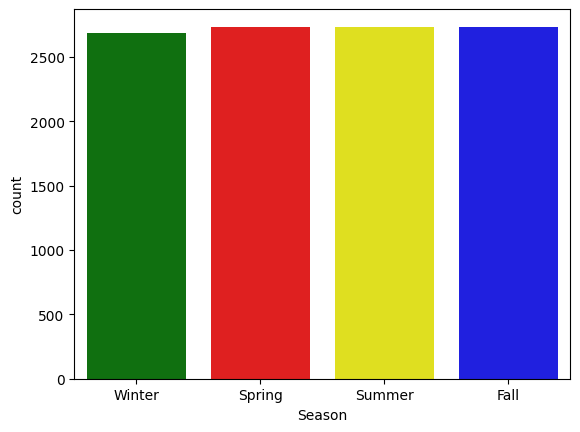

In [79]:
countplot(x='season', data=df, palette=['green','red','yellow','blue'])
xlabel('Season')
show()

----------------------------------

#### Mapping **weather column**

##### Clear + Few clouds + Partly cloudy + Partly cloudy ----> **Clear to Partly Cloudy**
##### Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ----> **Mist and Cloudy**
##### Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" ----> **Light Precipitation**
##### Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog ----> **Severe Weather**

In [80]:
df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [81]:
df["weather"] = df["weather"].map({1: "Clear to Partly Cloudy",\
                                        2 : "Mist and Cloudy", \
                                        3 : "Light Precipitation", \
                                        4 :"Severe Weather" })

C:\Users\RPC\AppData\Local\Temp\ipykernel_6288\3207305020.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  countplot(x='weather', data=df, palette=['green','red','yellow','blue'])


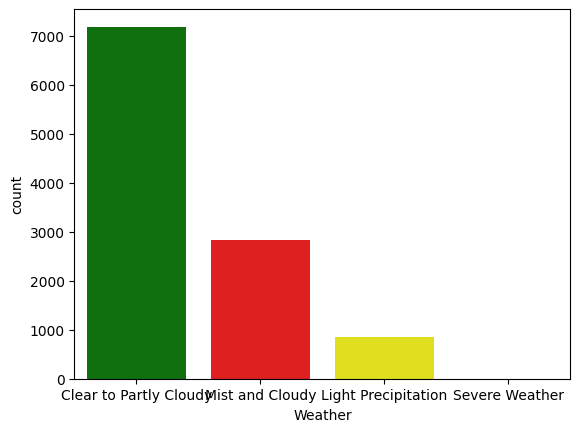

In [82]:
countplot(x='weather', data=df, palette=['green','red','yellow','blue'])
xlabel('Weather')
show()

---------------------------
--------------------------

## **Detect Outliers**

---------------------------

In [83]:
df[['count_of_users']].describe()

,count_of_users
count,10886.000000
mean,191.574132
std,181.144454
min,1.000000
25%,42.000000
50%,145.000000
75%,284.000000
max,977.000000


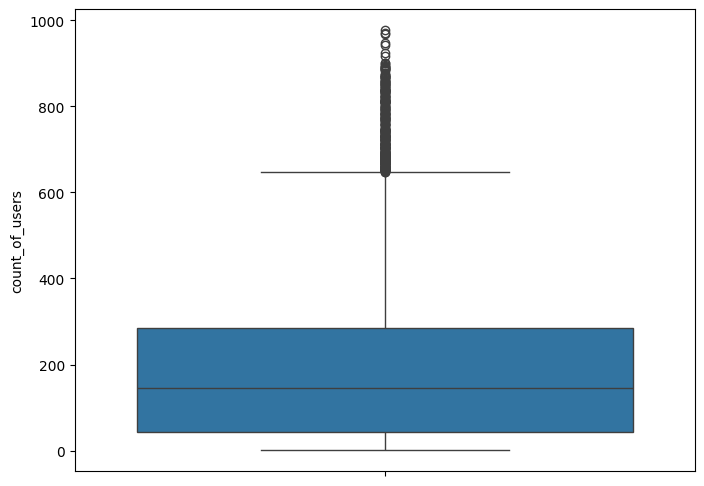

In [84]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 6)
boxplot(data=df,y="count_of_users",orient="v",ax=axes)
show()

- ##### **Median**: The median 'count_of_users' is relatively low, appearing to be around 150-200. This means that at least half of the observations have a user count below this value.

- ##### **Spread of Middle 50%**: The box itself is quite tall, indicating a considerable spread in the middle 50% of the 'count_of_users'. The range from Q1 to Q3 is relatively wide.

- ##### **Skewness**: The box plot shows a clear right-skewness.

- ##### The median line is closer to the bottom of the box, and the upper whisker is significantly longer than the lower one (though the lower whisker is very short, almost at 0).

- ##### This indicates that there are more data points with lower user counts, and a long tail of higher user counts.

- ##### **Outliers**: There are numerous data points plotted as individual circles above the upper whisker. These are outliers, representing instances with significantly higher 'count_of_users' than the typical range. The highest outlier is close to 1000 users.

- ##### **Lower Bound**: The lower whisker extends down to approximately 0, suggesting that user counts can be very low.



- ##### The majority of observations have a relatively low number of users.

- ##### The data is heavily skewed towards lower user counts, meaning high user counts are less frequent.

- ##### There's a significant presence of outliers, indicating that while most instances have low to moderate user counts, there are a good number of instances with exceptionally high user counts.

In [85]:
numerical_data=df[['count_of_users']]
for column in numerical_data.columns:
    Q1=numerical_data[column].quantile(0.25)
    Q3=numerical_data[column].quantile(0.75)
    IQR = Q3-Q1

    Lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    outliers = ((numerical_data[column]>Upper_bound)|(numerical_data[column]<Lower_bound)).sum()
    Total = numerical_data[column].shape[0]
    print(f'Total of outliers in {column} are   :   {outliers}--{round(100*(outliers)/Total,2)}%')
        
    if outliers > 0:
        df=df.loc[(df[column] <= Upper_bound) & (df[column] >= Lower_bound)]

Total of outliers in count_of_users are   :   300--2.76%


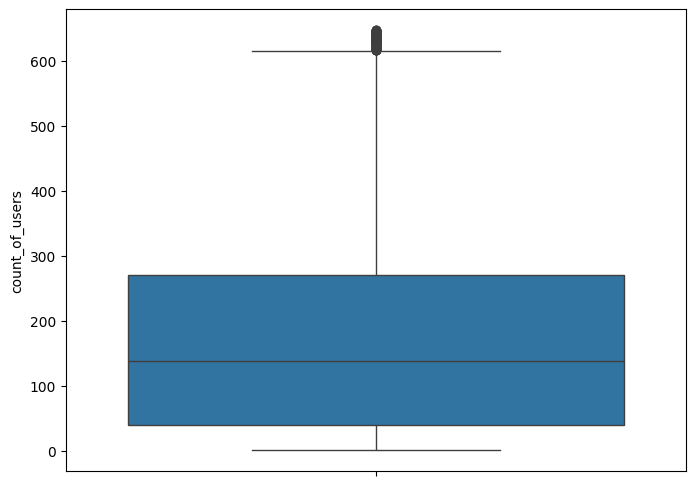

In [86]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(8, 6)
boxplot(data=df,y="count_of_users",orient="v",ax=axes)
show()

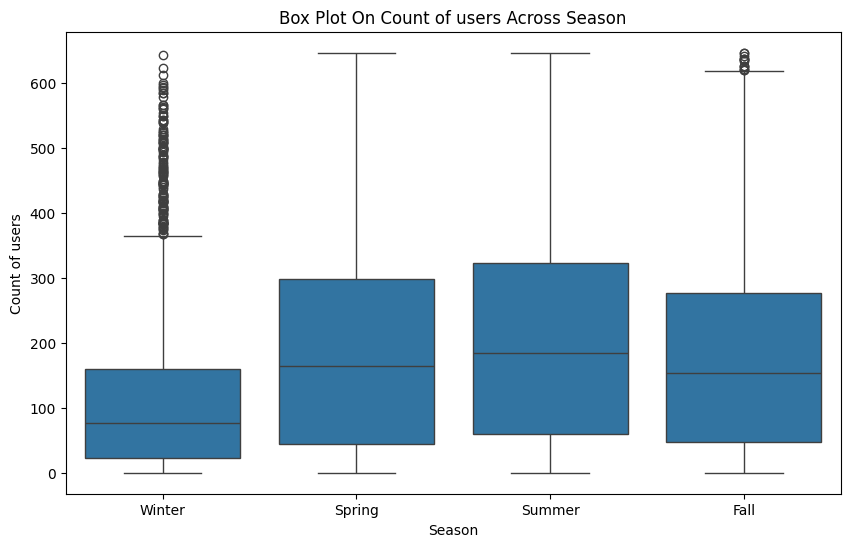

In [87]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="count_of_users",x="season",orient="v",ax=axes)
axes.set(xlabel='Season', ylabel='Count of users',title="Box Plot On Count of users Across Season")
show()

- ##### **Outliers**: All seasons show a significant number of outliers, particularly on the higher end of the 'count_of_users' scale. This indicates that regardless of the season, there are instances where user counts are exceptionally high.

- ##### **Skewness**: All distributions appear to be right-skewed, with the median closer to the bottom of the box and longer upper whiskers/outlier ranges. This suggests that in every season, lower user counts are more common, with fewer instances of very high user counts.

### **Season-Specific Observations**:

#### **Winter**:

- ##### Has the lowest median 'count_of_users' compared to other seasons (around 70-80).

- ##### The interquartile range (IQR) is relatively narrow, suggesting less variability in user counts during winter compared to other seasons.

- ##### Despite the lower typical counts, there are still many high outliers, some reaching over 600 users.

#### **Spring**:

- ##### Shows a noticeable increase in median 'count_of_users' compared to Winter (around 170-180).

- ##### The IQR is wider than Winter's, indicating more variability in user counts.

- ##### The upper whisker extends significantly higher, and there are high outliers, though they don't reach as high as some in Winter.

#### **Summer**:

- ##### Has the highest median 'count_of_users' among all seasons (around 180-190), very similar to Spring's median.

- ##### The IQR is also wide, comparable to Spring, suggesting similar variability.

- ##### The upper whisker and outliers extend to high values, similar to Spring.

#### **Fall**:

- ##### The median 'count_of_users' is slightly lower than Spring and Summer (around 150-160) but still higher than Winter.

- ##### The IQR is relatively wide, similar to Spring and Summer.

- ##### Like other seasons, Fall also exhibits many high outliers, reaching similar maximum values as Winter.



-----------------------

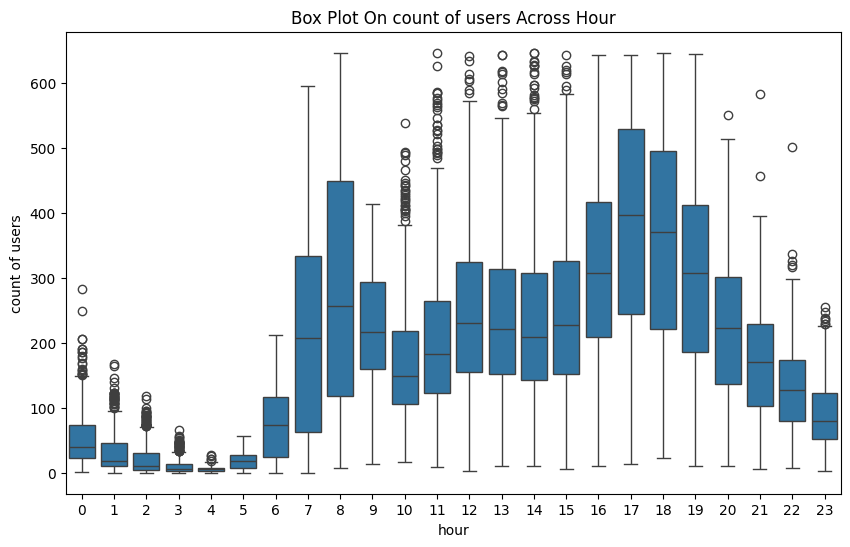

In [88]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="count_of_users",x="hour",orient="v",ax=axes)
axes.set(xlabel='hour', ylabel='count of users',title="Box Plot On count of users Across Hour")
show()

- ##### **Hourly Variation**: There's a very clear and significant variation in user counts throughout the day.

- ##### **Outliers**: Most hours, especially during peak times, show a considerable number of outliers on the higher end of the 'count_of_users' scale. This indicates that even within typical activity periods, there are instances of exceptionally high user engagement.

- ##### **Skewness**: Most hourly distributions are right-skewed, meaning lower user counts are more common, with a tail extending to higher counts.

- #### **Hourly Patterns**:

- ##### Early Morning (Hours 0-5):

- ##### User counts are generally very low.

- ##### The median count_of_users is at its lowest, often close to zero.

- ##### The interquartile range (IQR) is very narrow, indicating little variability.

- ##### A few outliers exist, but they are much lower than peak hours.

- ##### Hour 4 and 5 show a slight increase in median and IQR, perhaps indicating the start of the day for some users.

- #### **Morning/Commute (Hours 6-9)**:

- ##### A sharp increase in user activity begins around Hour 6.

- ##### The median count_of_users rises significantly, with Hour 7 and 8 showing substantial growth.

- ##### Hour 8 and 9 show high median values and a wider IQR, indicating more variability as activity ramps up. Hour 8 has a particularly high median and upper quartile.

- #### **Daytime (Hours 10-15)**:

- ##### User counts remain high, but the median fluctuates.

- ##### Hour 11, 12, 13, 14, and 15 generally maintain high median user counts, often above 200.

- ##### The IQR remains wide, and many high outliers are present, some reaching over 600 users.

- #### **Evening/Peak Hours (Hours 16-19)**:

- ##### These hours represent the peak activity period.

- ##### Hour 17 and 18 show the highest median count_of_users (around 500 and 490 respectively), indicating the busiest times of the day.

- ##### The boxes are very tall, showing significant variability in user counts, and there are numerous high outliers.

- ##### Hour 16 and 19 also exhibit high activity, though slightly lower than 17 and 18.

- #### Late Night (Hours 20-23):

- ##### User counts begin to decline steadily.

- ##### The median count_of_users decreases progressively from Hour 20 to 23.

- ##### The IQR also narrows, and while outliers are still present, their maximum values decrease.

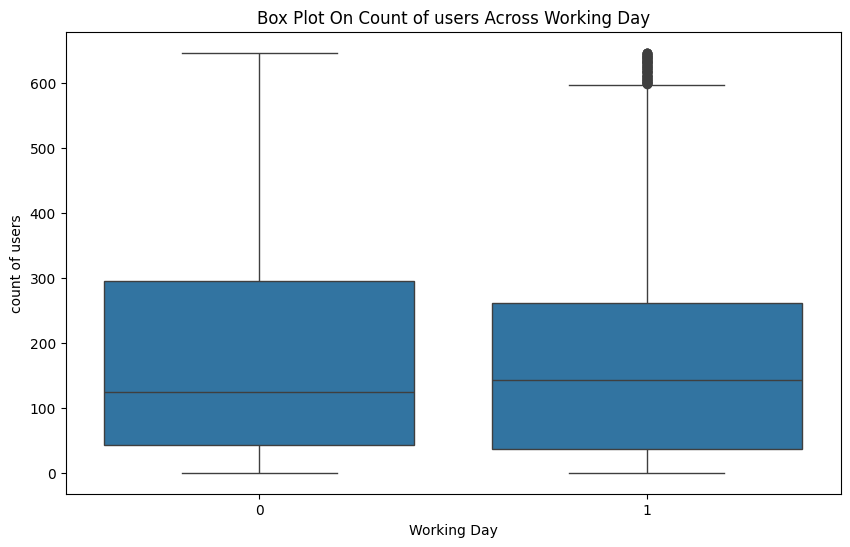

In [89]:
fig, axes = subplots(nrows=1,ncols=1)
fig.set_size_inches(10, 6)
boxplot(data=df,y="count_of_users",x="workingday",orient="v",ax=axes)
axes.set(xlabel='Working Day', ylabel='count of users',title="Box Plot On Count of users Across Working Day")
show()

- ##### **Outliers**: Both categories (working day and non-working day) show a significant number of outliers, particularly on the higher end of the 'count_of_users' scale. This indicates that even within typical day types, there are instances of exceptionally high user engagement.

- ##### **Skewness**: Both distributions appear to be right-skewed, with the median closer to the bottom of the box and longer upper whiskers/outlier ranges. This suggests that in both working and non-working days, lower user counts are more common, with fewer instances of very high user counts.

### **Comparison of Working Day (1) vs. Non-Working Day (0):**

- #### **Median count_of_users**:

- ##### Non-Working Day (0): The median count_of_users is around 120-130.

- ##### Working Day (1): The median count_of_users is slightly higher, around 140-150.

- ##### This suggests that, on average, there might be a slightly higher number of users on working days compared to non-working days.

- #### **Interquartile Range (IQR)**:

- ##### Non-Working Day (0): The box is relatively tall, indicating a wide spread in the middle 50% of user counts.

- ##### Working Day (1): The box is also quite tall, with a similar or slightly narrower spread compared to non-working days.

- ##### Both day types show considerable variability in user counts within their typical ranges.

- #### **Range of Data (excluding outliers)**:

- ##### The lower whisker for both categories extends close to 0, indicating that very low user counts can occur on any type of day.

- ##### The upper whiskers extend to similar maximum values for both categories, suggesting that the upper range of typical user counts is similar.

- #### **Outliers**:

##### Both categories show a similar range of high outliers, reaching up to around 600-650 users. This implies that exceptionally high user activity can occur on both working and non-working days.



In [ ]:
# df.to_excel('Bake rental (New data).xlsx',index=False)

---------------------------------
--------------------------------

## **Analysis**

--------------------------------

- **Visualisation of continuous features vs Number of users**

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,Actual_Temperature,Feels_Like_Temperature,humidity,windspeed,non-subscribed_users,...,count_of_users,date,time,year,month,day,weekend,hour,the_usual_time_periods_per_day,weather_feeling
0,2011-01-01 00:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,81,0.0,3,...,16,2011-01-01,00:00:00,2011,January,Saturday,Weekend,0,Midnight and After,Cool
1,2011-01-01 01:00:00,Winter,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,8,...,40,2011-01-01,01:00:00,2011,January,Saturday,Weekend,1,Midnight and After,Cool
2,2011-01-01 02:00:00,Winter,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,5,...,32,2011-01-01,02:00:00,2011,January,Saturday,Weekend,2,Midnight and After,Cool
3,2011-01-01 03:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,3,...,13,2011-01-01,03:00:00,2011,January,Saturday,Weekend,3,Midnight and After,Cool
4,2011-01-01 04:00:00,Winter,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,0,...,1,2011-01-01,04:00:00,2011,January,Saturday,Weekend,4,Midnight and After,Cool


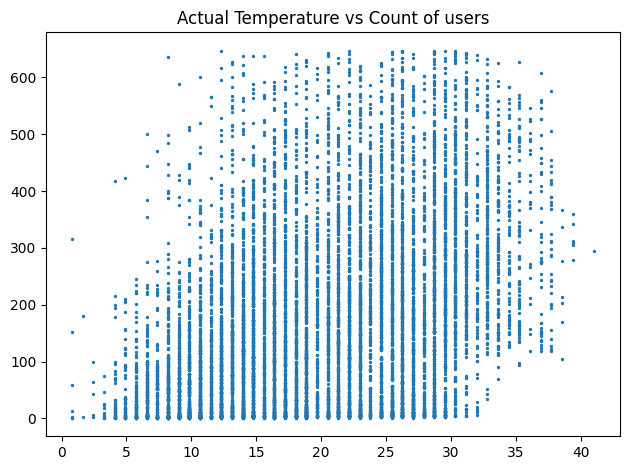

In [ ]:
title('Actual Temperature vs Count of users')
scatter(df['Actual_Temperature'],df['count_of_users'],s=2)
tight_layout()

- ##### **Positive Association (up to a point)**: There appears to be a general positive association between 'Actual Temperature' and 'Count of users' for temperatures roughly between 5°C and 25°C. As the temperature increases in this range, the maximum and typical 'Count of users' also tend to increase.

- ##### **Peak Activity Range**: The highest 'Count of users' (reaching above 600) seems to occur within a temperature range of approximately 15°C to 30°C. This suggests an optimal temperature window for user activity.

#### **Decreased Activity at Extremes**:

- ##### At very low temperatures (below 5°C), the 'Count of users' is consistently low, mostly below 100.

- ##### At very high temperatures (above 30°C), while there are still some high user counts, the overall density of points and the maximum observed user counts appear to decrease compared to the peak range. The spread of user counts also seems to narrow at very high temperatures.

- ##### **Vertical Bands/Density**: The data points form dense vertical bands, especially in the 10°C to 30°C range. This indicates that for a given temperature, there can be a wide range of 'Count of users' values, from very low to very high.

- ##### **No Clear Linear Relationship**: While there's a general trend, the relationship is not strictly linear. It seems to follow a curvilinear pattern, increasing, peaking, and then potentially decreasing or leveling off.

---------------------------------------

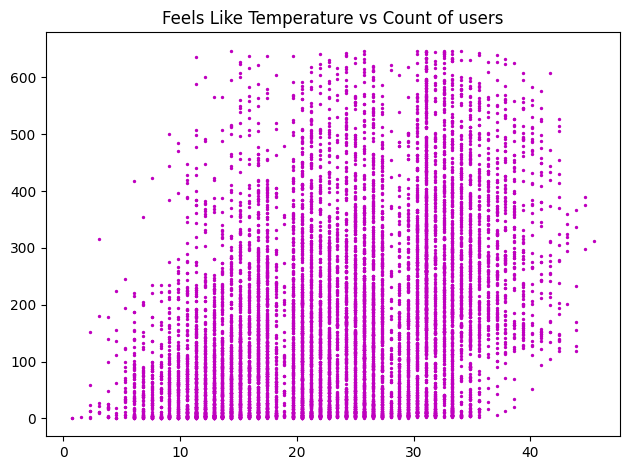

In [ ]:
title('Feels Like Temperature vs Count of users')
scatter(df['Feels_Like_Temperature'],df['count_of_users'],s=2,c='m')
tight_layout()

- ##### **Positive Association (up to a point)**: Similar to the 'Actual Temperature' plot, there appears to be a general positive association between 'Feels Like Temperature' and 'Count of users' for temperatures roughly between 5°C and 25°C. As the 'feels like' temperature increases in this range, the maximum and typical 'Count of users' also tend to increase.

- ##### **Peak Activity Range**: The highest 'Count of users' (reaching above 600) seems to occur within a 'feels like' temperature range of approximately 15°C to 35°C. This suggests an optimal 'feels like' temperature window for user activity.

#### **Decreased Activity at Extremes**:

- ##### At very low 'feels like' temperatures (below 5°C), the 'Count of users' is consistently low, mostly below 100.

- ##### At very high 'feels like' temperatures (above 35°C), while there are still some high user counts, the overall density of points and the maximum observed user counts appear to decrease compared to the peak range. The spread of user counts also seems to narrow at very high temperatures.

- ##### **Vertical Bands/Density**: The data points form dense vertical bands, especially in the 10°C to 35°C range. This indicates that for a given 'feels like' temperature, there can be a wide range of 'Count of users' values, from very low to very high.

- ##### **No Clear Linear Relationship**: While there's a general trend, the relationship is not strictly linear. It seems to follow a curvilinear pattern, increasing, peaking, and then potentially decreasing or leveling off.

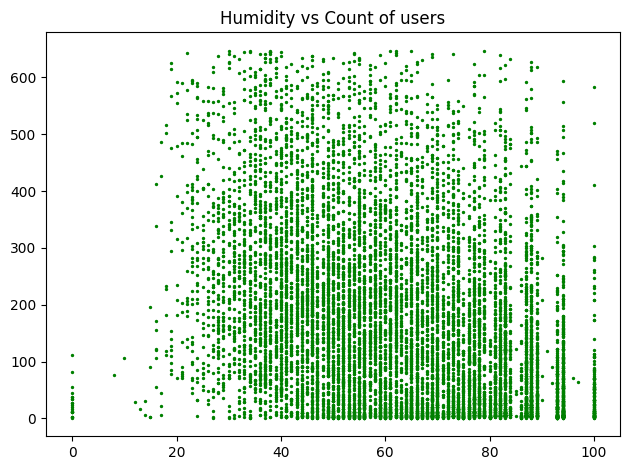

In [ ]:
title('Humidity vs Count of users')
scatter(df['humidity'],df['count_of_users'],s=2,c='g')
tight_layout()

- ##### **Inverse Relationship (General Trend)**: There appears to be a general inverse or negative relationship between 'Humidity' and 'Count of users' for humidity levels roughly between 20% and 80%. As humidity increases in this range, the maximum and typical 'Count of users' tend to decrease.

- ##### **Peak Activity Range**: The highest 'Count of users' (reaching above 600) seems to occur within a humidity range of approximately 20% to 60%. This suggests that lower to moderate humidity levels are associated with higher user activity.

#### **Decreased Activity at Extremes**:

- ##### At very low humidity levels (below 20%), the 'Count of users' is generally low, mostly below 100.

- ##### At very high humidity levels (above 80%), the 'Count of users' also tends to be lower, with fewer instances of high user counts. There's a notable drop-off in the density of points and maximum user counts as humidity approaches 90-100%.

- ##### **Vertical Spread/Density**: For a given humidity level, there can be a wide range of 'Count of users' values, from very low to very high. This is indicated by the dense vertical spread of points across much of the humidity range.

-----------------------

##### **Months groub by mean of count of users**

In [ ]:
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = DataFrame(df.groupby("month")["count_of_users"].mean()).reset_index()

In [ ]:
monthAggregated

,month,count_of_users
0,April,167.282633
1,August,209.696101
2,December,167.947720
3,February,110.003330
4,January,90.366516
5,July,219.409040
6,June,218.017241
7,March,138.040678
8,May,202.437146
9,November,185.039106


C:\Users\RPC\AppData\Local\Temp\ipykernel_17052\2799023441.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot(data=monthAggregated, x="month", y="count_of_users", ax=ax, order=sortOrder, palette="viridis")


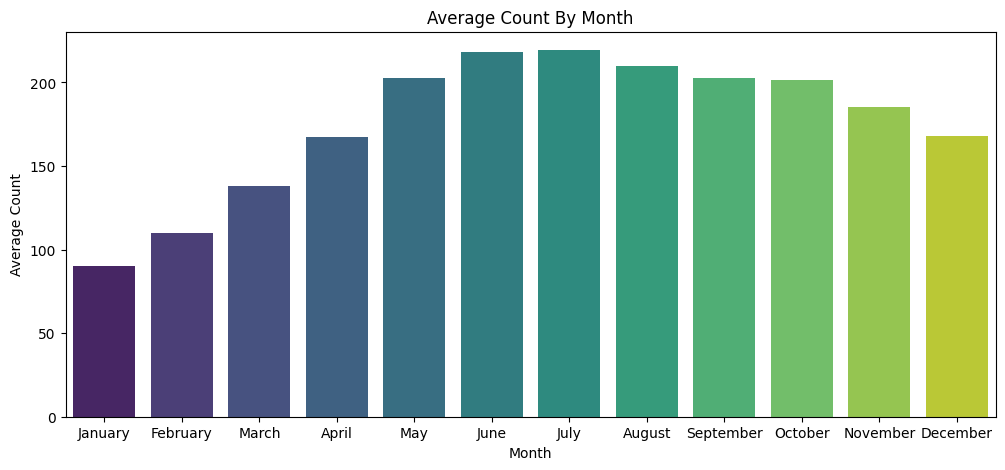

In [ ]:
fig, ax = subplots()
fig.set_size_inches(12, 5)

barplot(data=monthAggregated, x="month", y="count_of_users", ax=ax, order=sortOrder, palette="viridis")
ax.set(xlabel='Month', ylabel='Average Count', title="Average Count By Month")
show()

- ##### **Clear Seasonal Pattern**: There's a very distinct seasonal pattern in the average count.

- ##### **Lowest Counts in Winter**: January has the lowest average count, followed by February.

- ##### **Gradual Increase in Spring**: The average count steadily increases from March through April and May.

- ##### **Peak in Summer**: June and July show the highest average counts, indicating peak activity during these summer months. August also maintains a high average count.

- ##### **Decline in Fall/Winter**: The average count begins to decline from September through October, November, and December, returning to lower levels as winter approaches.

- ##### **Color Gradient**: The bars are colored with a gradient, visually reinforcing the trend from lower counts (darker purple/blue) to higher counts (greens/teals) and back to lower (yellow-green).

-------------------

##### **Hours and season groub by mean of count of users**

In [ ]:
hourAggregated = DataFrame(df.groupby(["hour","season"], sort=True)["count_of_users"].mean()).reset_index()
hourAggregated

,hour,season,count_of_users
0,0,Fall,57.877193
1,0,Spring,58.473684
2,0,Summer,75.675439
3,0,Winter,28.292035
4,1,Fall,36.166667
...,...,...,...
91,22,Winter,72.912281
92,23,Fall,89.298246
93,23,Spring,101.684211
94,23,Summer,121.719298


C:\Users\RPC\AppData\Local\Temp\ipykernel_17052\2794846622.py:3: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  pointplot(x=hourAggregated["hour"], y=hourAggregated["count_of_users"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)


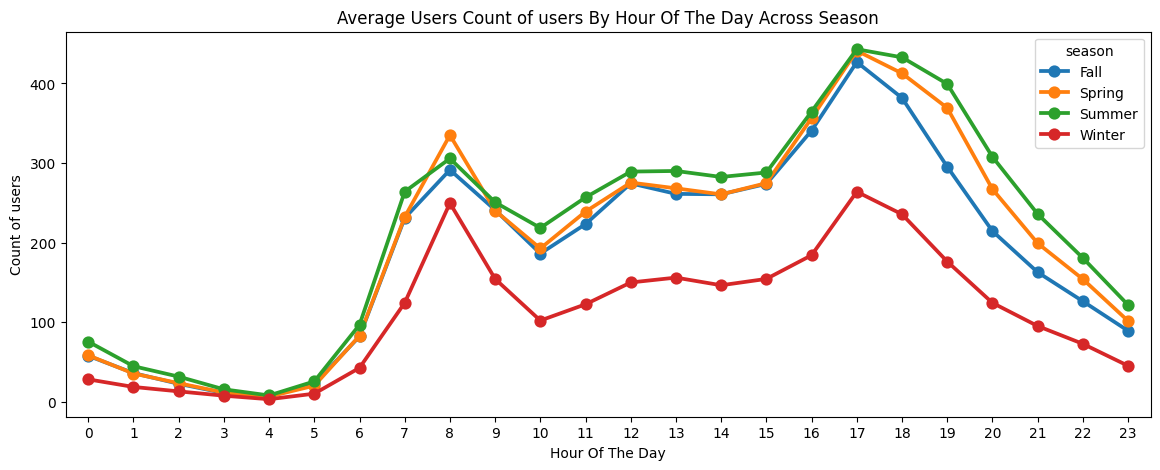

In [ ]:
fig,ax= subplots()
fig.set_size_inches(14,5)
pointplot(x=hourAggregated["hour"], y=hourAggregated["count_of_users"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Count of users',title="Average Users Count of users By Hour Of The Day Across Season",label='big')
show()

- ##### **Clear Daily and Seasonal Patterns:** The plot clearly shows distinct daily cycles of user activity, with significant differences between seasons.

- ##### **Two Peaks in User Activity**: For most seasons, there appear to be two main peaks in user activity: one in the morning/late morning and another, more prominent, in the late afternoon/early evening.

- ##### **Lowest Activity in Early Morning**: User counts are consistently lowest across all seasons in the very early morning hours (approximately 1 AM to 5 AM).

#### **Season-Specific Patterns**:

- #### **Summer (Green Line)**:

- ##### Generally shows the highest average user counts throughout the day, especially during peak hours.

- ##### Morning peak is around 8 AM (over 300 users).

- ##### Evening peak is the highest of all seasons, reaching over 400 users around 5 PM - 6 PM (17:00-18:00).

- ##### Maintains high activity levels for a longer duration during the day.

- #### **Spring (Orange Line)**:

- ##### Follows a very similar pattern to Summer, often just slightly below Summer's counts.

- ##### Morning peak around 8 AM (around 300 users).

- ##### Evening peak around 5 PM - 6 PM (17:00-18:00), also very high (close to 400 users).

- #### Fall (Blue Line):

- ##### Shows a similar daily pattern to Spring and Summer but with slightly lower average counts overall, particularly during the evening peak.

- ##### Morning peak around 8 AM (around 290 users).

- ##### Evening peak around 5 PM - 6 PM (17:00-18:00), reaching around 380-390 users.

- #### Winter (Red Line):

- ##### Consistently shows the lowest average user counts throughout the day compared to other seasons.

- ##### Morning peak is lower, around 8 AM (around 250 users).

- ##### Evening peak is also significantly lower, around 5 PM - 6 PM (17:00-18:00), reaching around 260-270 users.

- ##### The overall curve is flatter, indicating less extreme fluctuations in user activity compared to warmer seasons.

-------------------------

##### **Hours and days groub by mean of count of users**

In [ ]:
hourAggregated = DataFrame(df.groupby(["hour","day"],sort=True)["count_of_users"].mean()).reset_index()
hourAggregated

,hour,day,count_of_users
0,0,Friday,53.234375
1,0,Monday,35.492308
2,0,Saturday,98.212121
3,0,Sunday,96.227273
4,0,Thursday,37.476923
...,...,...,...
163,23,Saturday,120.030303
164,23,Sunday,64.757576
165,23,Thursday,99.630769
166,23,Tuesday,76.061538


C:\Users\RPC\AppData\Local\Temp\ipykernel_17052\2714275970.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  pointplot(x=hourAggregated["hour"], y=hourAggregated["count_of_users"],hue=hourAggregated["day"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax)


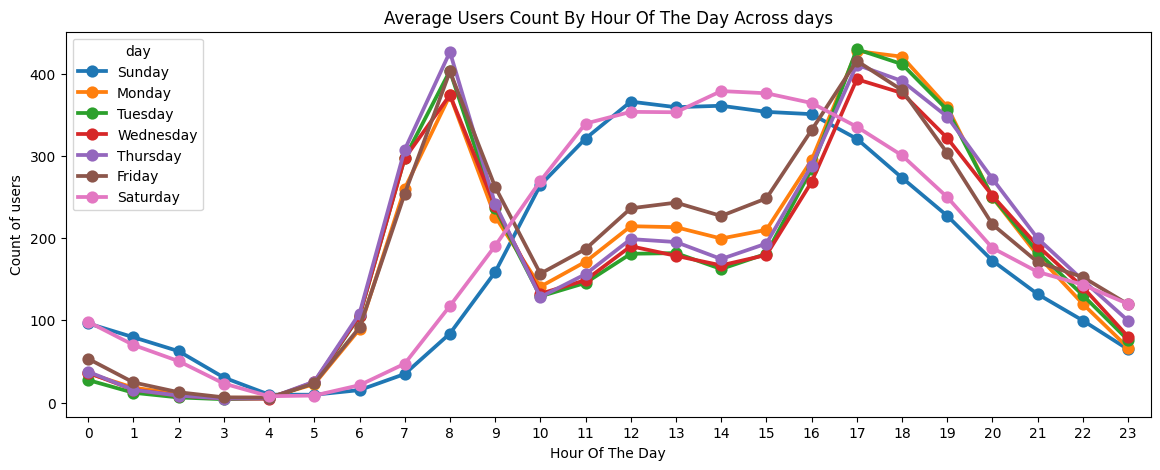

In [ ]:
fig,ax= subplots()
fig.set_size_inches(14,5)

pointplot(x=hourAggregated["hour"], y=hourAggregated["count_of_users"],hue=hourAggregated["day"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Count of users',title="Average Users Count By Hour Of The Day Across days",label='big')
show()

- ##### **Clear Daily Cycles**: All days exhibit a distinct daily cycle of user activity, with lows in the early morning and peaks during the day.

- ##### **Weekend vs. Weekday Patterns**: There are noticeable differences between weekend (Saturday, Sunday) and weekday (Monday-Friday) patterns.

- ##### **Early Morning Lows**: User counts are consistently very low across all days in the early morning hours (approximately 1 AM to 5 AM).

### Day-Specific Patterns:

- ##### **Weekdays (Monday-Friday)**:

- ##### **Morning Peak**: Most weekdays show a prominent morning peak around 8 AM - 9 AM. This is likely associated with the start of the workday/school day. Thursday and Friday's morning peaks are slightly lower than Monday-Wednesday.

- ##### **Mid-day Dip**: After the morning peak, there's a noticeable dip in user counts during late morning/early afternoon (around 9 AM - 3 PM).

- ##### **Evening Peak**: All weekdays show a strong evening peak, typically around 5 PM - 7 PM (17:00-19:00). This peak is generally higher than the morning peak. Tuesday and Wednesday often show the highest evening peaks among weekdays, reaching over 400 users.

- ##### **Decline**: User counts gradually decline from the evening peak into the late night.

### Weekends (Saturday & Sunday):

- ##### **Delayed Morning Activity**: Activity starts later in the morning compared to weekdays. The sharp rise in users begins around 7 AM - 8 AM, rather than 6 AM.

- ##### **Single, Broader Peak**: Instead of distinct morning and evening peaks, weekends tend to have a single, broader peak of activity that spans from late morning through the afternoon.

- ##### **Saturday**: Shows a strong, sustained high level of activity from around 10 AM to 6 PM (18:00), with a peak around 1 PM - 2 PM (13:00-14:00). The overall activity level is often lower than weekday evening peaks but higher than weekday mid-day dips.

- ##### **Sunday**: Similar to Saturday, with a broad peak, but often with slightly lower overall counts than Saturday, especially in the afternoon.

### Key Differences Summarized:

- ##### **Weekday**: Characterized by two distinct peaks (morning and evening), with a mid-day dip. The evening peak is usually the highest.

- ##### **Weekend**: Characterized by a later start to activity and a single, broader peak spanning the afternoon.

------------------------

##### **Hours groub by mean of subscribed users + non-subscribed users**

In [ ]:
hourTransformed = melt(df[["hour","non-subscribed_users","subscribed_users"]], id_vars=['hour'], value_vars=['non-subscribed_users', 'subscribed_users'])
hourAggregated = DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
hourAggregated.head()

,hour,variable,value
0,0,non-subscribed_users,10.312088
1,0,subscribed_users,44.826374
2,1,non-subscribed_users,6.513216
3,1,subscribed_users,27.345815
4,2,non-subscribed_users,4.819196


C:\Users\RPC\AppData\Local\Temp\ipykernel_17052\1769763816.py:4: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0.

  pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["non-subscribed_users","subscribed_users"], data=hourAggregated, join=True,ax=ax)


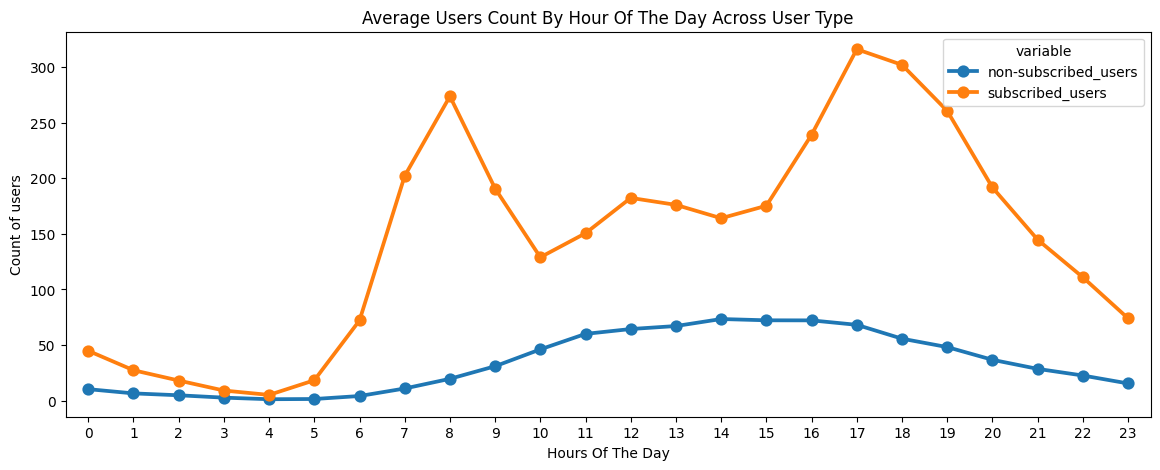

In [ ]:
fig,ax= subplots()
fig.set_size_inches(14,5)

pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["non-subscribed_users","subscribed_users"], data=hourAggregated, join=True,ax=ax)
ax.set(xlabel='Hours Of The Day', ylabel='Count of users',title="Average Users Count By Hour Of The Day Across User Type",label='big')
show()

### Subscribed Users Dominate Total Count:

- ##### The 'subscribed_users' (orange line) consistently show a significantly higher average count at almost all hours compared to 'non-subscribed_users' (blue line). This indicates that the majority of the overall user activity is driven by subscribed users.

- #### **Distinct Daily Patterns for Each User Type:**

- ##### **Non-subscribed Users (Blue Line)**:

- ##### Low Activity in Early Morning: Very low counts from 0 to 5 AM.

- ##### Gradual Increase: A slow, steady increase in average count from around 6 AM, peaking in the afternoon/early evening (around 3 PM - 5 PM / 15:00-17:00), reaching an average of about 70-75 users.

- ##### Slow Decline: A gradual decline in counts through the late evening.

- ##### The curve is relatively flat and does not show sharp peaks, suggesting a more consistent, less volatile activity pattern.

- #### Subscribed Users (Orange Line):

- ##### Low Activity in Early Morning: Similar to non-subscribed users, very low counts from 0 to 5 AM.

- ##### Sharp Morning Peak: A rapid increase in activity starting around 6 AM, leading to a prominent morning peak around 8 AM (over 270 users). This suggests a strong morning rush for subscribed users.

- ##### Mid-day Dip: A noticeable dip in activity after the morning peak (around 9 AM - 10 AM).

- ##### gher Evening Peak: Activity rises again, reaching an even higher evening peak around 5 PM - 6 PM (17:00-18:00), exceeding 300 users. This is the highest point of activity for subscribed users.

- ##### Steep Decline: A relatively steep decline in counts through the late evening.

### **Comparison and Interpretation**:

- ##### Peak Times: Subscribed users exhibit two distinct peaks (morning and evening), which align with typical workday hours, suggesting they might be using the service for work-related or routine activities. Non-subscribed users have a single, broader, and much lower peak in the afternoon.

- ##### Magnitude of Activity: Subscribed users contribute far more to the overall user count at any given hour.

- ##### Behavioral Differences: The differing patterns suggest distinct behavioral characteristics between the two user types. Subscribed users show more structured, perhaps routine-driven, engagement, while non-subscribed users have a flatter, lower-level activity profile.

----------------------------
----------------------------

## <center><strong> Conclusion </strong></center>

#### **The Bike rental effectively demonstrates that bike rental demand is strongly influenced by a combination of environmental and temporal factors. The exploratory data analysis clearly shows peak rental hours during typical commute times, a significant drop in demand during adverse weather conditions, and a positive correlation with favorable temperatures and seasons. This comprehensive analysis provides crucial insights for optimizing bike distribution, managing inventory, and informing strategic decisions for bike-sharing services.**

In [1]:
# !jupyter nbconvert --to html "Bake rental analysis.ipynb"